# Exploratory Data Analysis and Machine Learning Classification on Campus Recruitment


Hello. I conducted an EDA and ML study on Campus Recruitment Dataset in this notebook. I performed Data Analysis on the dataset using visualization tools. Next, I tried using the data to predict whether a candidate would be hired on campus. I've added my comments and inferences under the code snippets.

## I have been denied access to my account. That's why I'm sharing it again.

### If you have questions please ask them on the comment section.

### I will be glad if you can give feedback.

Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
   1. [Univariate Variable Analysis](#4)
      1. [Categorical Variables](#5)
      1. [Numerical Variables](#6)
1. [Basic Data Analysis](#7)
   1. [gender](#8)
   1. [ssc_b](#9)
   1. [hsc_b](#10)
   1. [degree_t](#11)
   1. [workex](#12)
   1. [specialisation](#13)
   1. [Triple Review](#14)
1. [Questions](#27)
   1. [Does percentage matters for one to get placed?](#28)
   1. [Which degree specialization is much demanded by corporate?](#29)
1. [Pandas Profiling](#15)
1. [Correlation](#16)
1. [Anomaly Detection](#17)
1. [Missing Values](#18)
   1. [salary](#19)
1. [Encoding](#20)
   1. [Label Encoding](#21)
   1. [One-Hot Encoding](#22)
1. [Train-Test Split](#23)
1. [Scores of Models](#24)
1. [Evaluation of Models](#25)
   1. [Another Question: Which factor influenced a candidate in getting placed?](#40)
1. [Conclusion](#26)      

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


<a id="1"></a> 
# Importing the Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a> 
# Read Datas & Explanation of Features & Information About Datasets

In [3]:
dataset = pandas.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
dataset.sample(10)

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
2        3      M   65.0  Central  68.00  Central      Arts     64.00   
102    103      F   77.0   Others  61.00   Others  Commerce     68.00   
62      63      F   86.5   Others  64.20   Others   Science     67.40   
121    122      F   64.0  Central  67.00   Others   Science     69.60   
84      85      M   70.0  Central  63.00   Others   Science     70.00   
22      23      F   69.8   Others  60.80   Others   Science     72.23   
111    112      M   51.0   Others  54.00   Others   Science     61.00   
150    151      M   71.0  Central  58.66  Central   Science     58.00   
91      92      M   52.0  Central  57.00  Central  Commerce     50.80   
127    128      F   72.0   Others  60.00   Others   Science     69.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
2    Comm&Mgmt     No    75.00        Mkt&Fin  57.80      Placed  250000.0  
102  Comm&Mgmt    Yes    57.50        Mkt&Fin  61.31      Placed  300000.0  
62    Sci&Tech     No    59.00        Mkt&Fin  59.69      Placed  240000.0  
121   Sci&Tech    Yes    55.67         Mkt&HR  71.49      Placed  250000.0  
84    Sci&Tech    Yes    55.00        Mkt&Fin  62.00      Placed  300000.0  
22    Sci&Tech     No    55.53         Mkt&HR  68.81      Placed  360000.0  
111   Sci&Tech     No    60.00         Mkt&HR  60.64  Not Placed       NaN  
150   Sci&Tech    Yes    56.00        Mkt&Fin  61.30      Placed  690000.0  
91   Comm&Mgmt     No    67.00         Mkt&HR  62.79  Not Placed       NaN  
127  Comm&Mgmt     No    55.50         Mkt&HR  58.40      Placed  250000.0

In [4]:
dataset.tail()

sl_no gender  ssc_p    ssc_b  hsc_p   hsc_b     hsc_s  degree_p  \
210    211      M   80.6   Others   82.0  Others  Commerce      77.6   
211    212      M   58.0   Others   60.0  Others   Science      72.0   
212    213      M   67.0   Others   67.0  Others  Commerce      73.0   
213    214      F   74.0   Others   66.0  Others  Commerce      58.0   
214    215      M   62.0  Central   58.0  Others   Science      53.0   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN

***I dropped 'id' column because it can cause unwanted correlation.***

In [5]:
dataset.drop("sl_no", axis=1, inplace=True)

<a id="3"></a> 
## Variable Descriptions

***sl_no:** Serial Number

***gender:** Gender- Male='M',Female='F'

***ssc_p:** Secondary Education percentage- 10th Grade

***ssc_b:** Board of Education- Central/ Others

***hsc_p:** Higher Secondary Education percentage- 12th Grade

***hsc_b:** Board of Education- Central/ Others

***hsc_s:** Specialization in Higher Secondary Education

***degree_p:** Degree Percentage

***degree_t:** Under Graduation(Degree type)- Field of degree education

***workex:** Work Experience

***etest_p:** Employability test percentage ( conducted by college)

***specialisation:** Post Graduation(MBA)- Specialization

***mba_p:** MBA percentage

***status:** Status of placement- Placed/Not placed

***salary:** Salary offered by corporate to candidates

Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


<a id="4"></a> 
## Univariate Variable Analysis

*** Categorical Variables:** ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

*** Numerical Variables:** ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

<a id="5"></a> 
### Categorical Variables

In [7]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [8]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


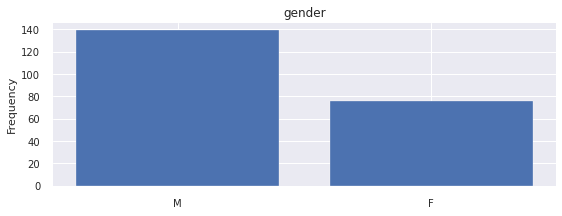

gender:
M    139
F     76
Name: gender, dtype: int64


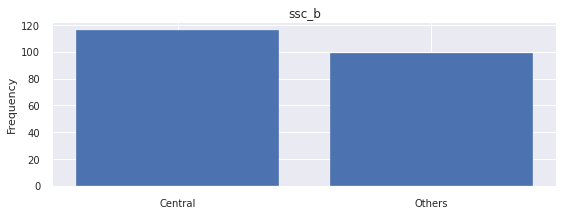

ssc_b:
Central    116
Others      99
Name: ssc_b, dtype: int64


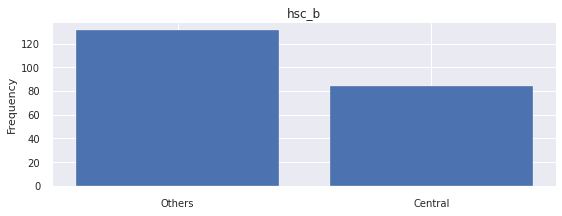

hsc_b:
Others     131
Central     84
Name: hsc_b, dtype: int64


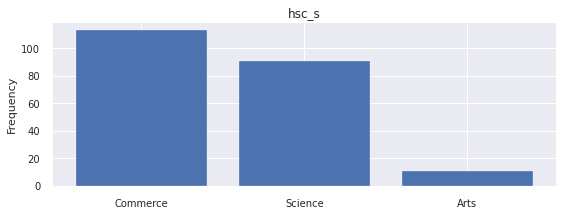

hsc_s:
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


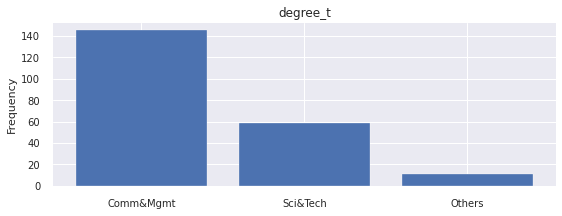

degree_t:
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


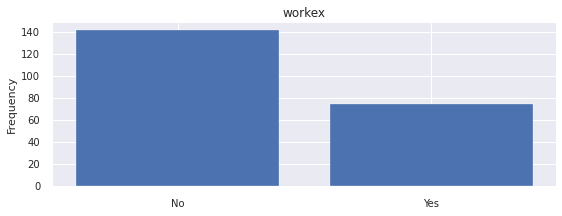

workex:
No     141
Yes     74
Name: workex, dtype: int64


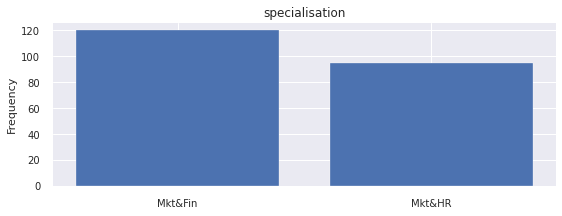

specialisation:
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


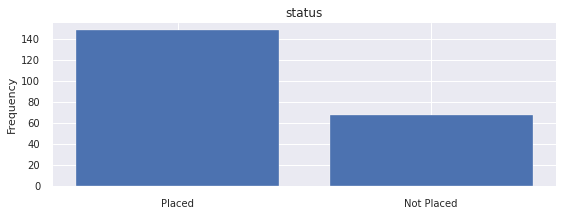

status:
Placed        148
Not Placed     67
Name: status, dtype: int64


In [9]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id="6"></a> 
### Numerical Variables

In [10]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

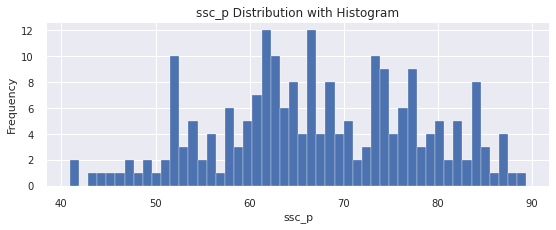

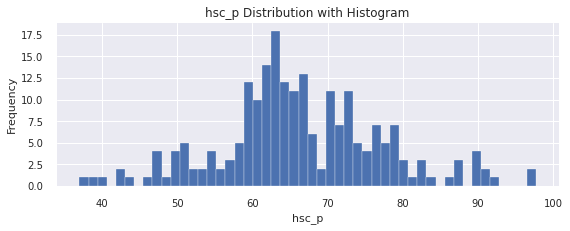

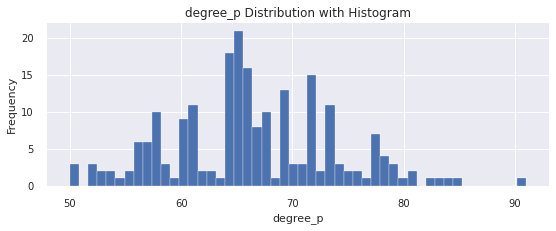

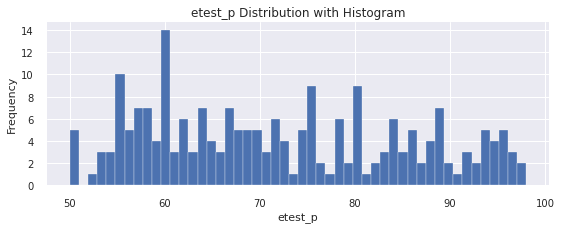

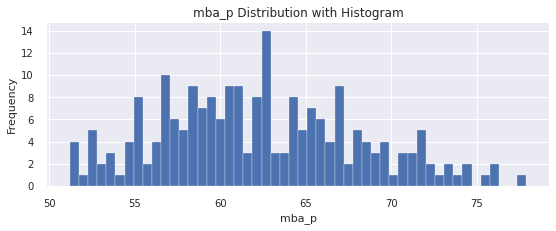

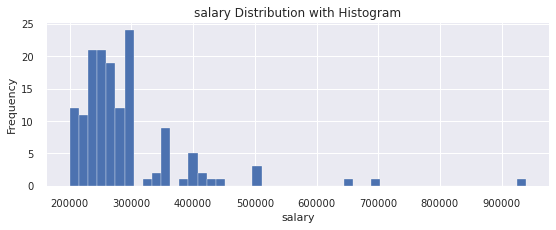

In [12]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'salary Interval and Counts')

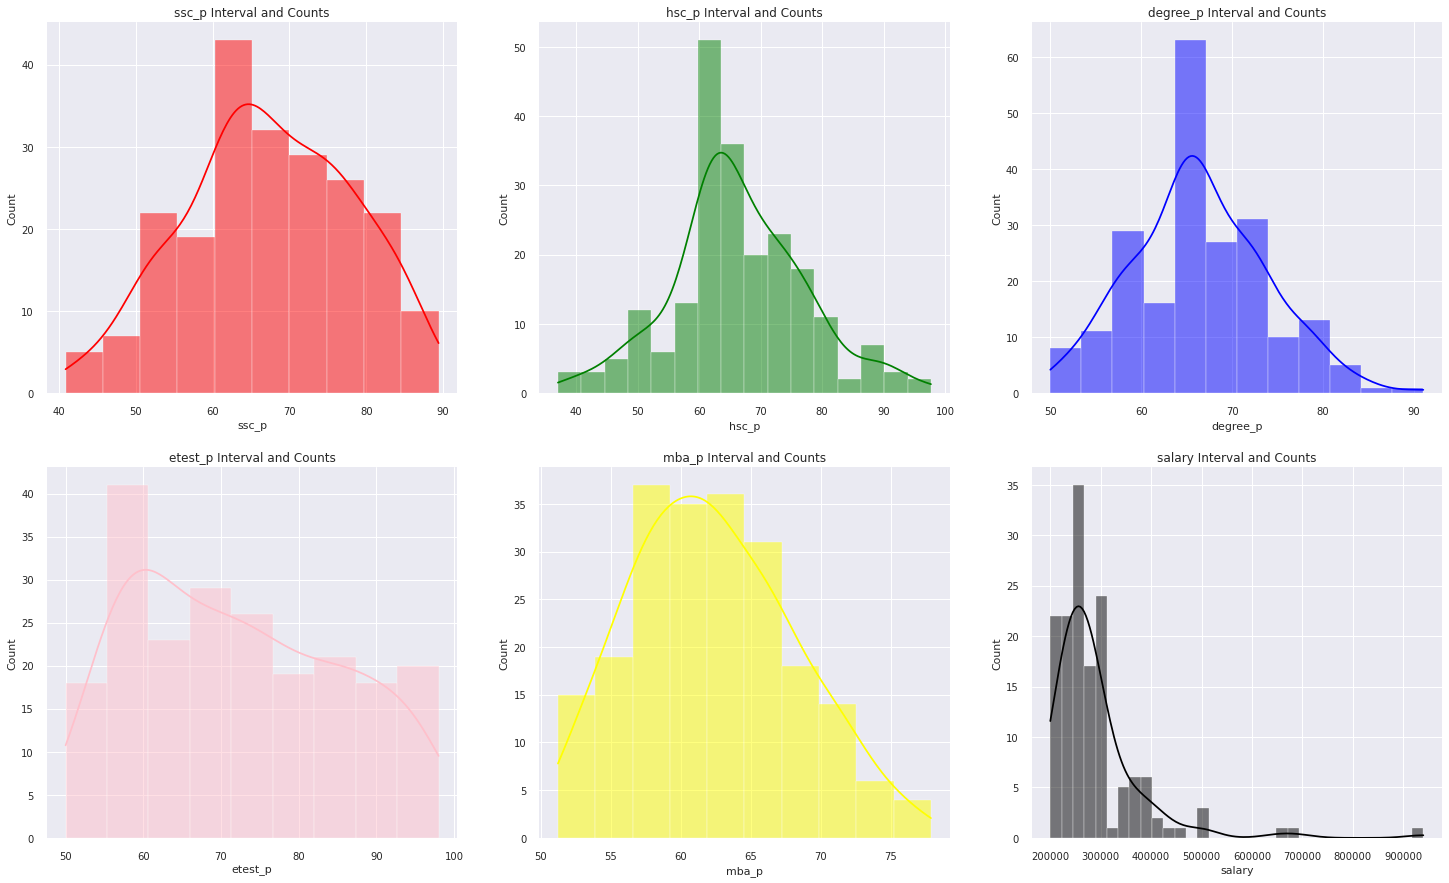

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['ssc_p'], color = 'red', kde = True).set_title('ssc_p Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['hsc_p'], color = 'green', kde = True).set_title('hsc_p Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['degree_p'], kde = True, color = 'blue').set_title('degree_p Interval and Counts')

plt.subplot(2,3,4)
sns.histplot(dataset['etest_p'], kde = True, color = 'pink').set_title('etest_p Interval and Counts')

plt.subplot(2,3,5)
sns.histplot(dataset['mba_p'], kde = True, color = 'yellow').set_title('mba_p Interval and Counts')

plt.subplot(2,3,6)
sns.histplot(dataset['salary'], kde = True, color = 'black').set_title('salary Interval and Counts')

<AxesSubplot:xlabel='status', ylabel='salary'>

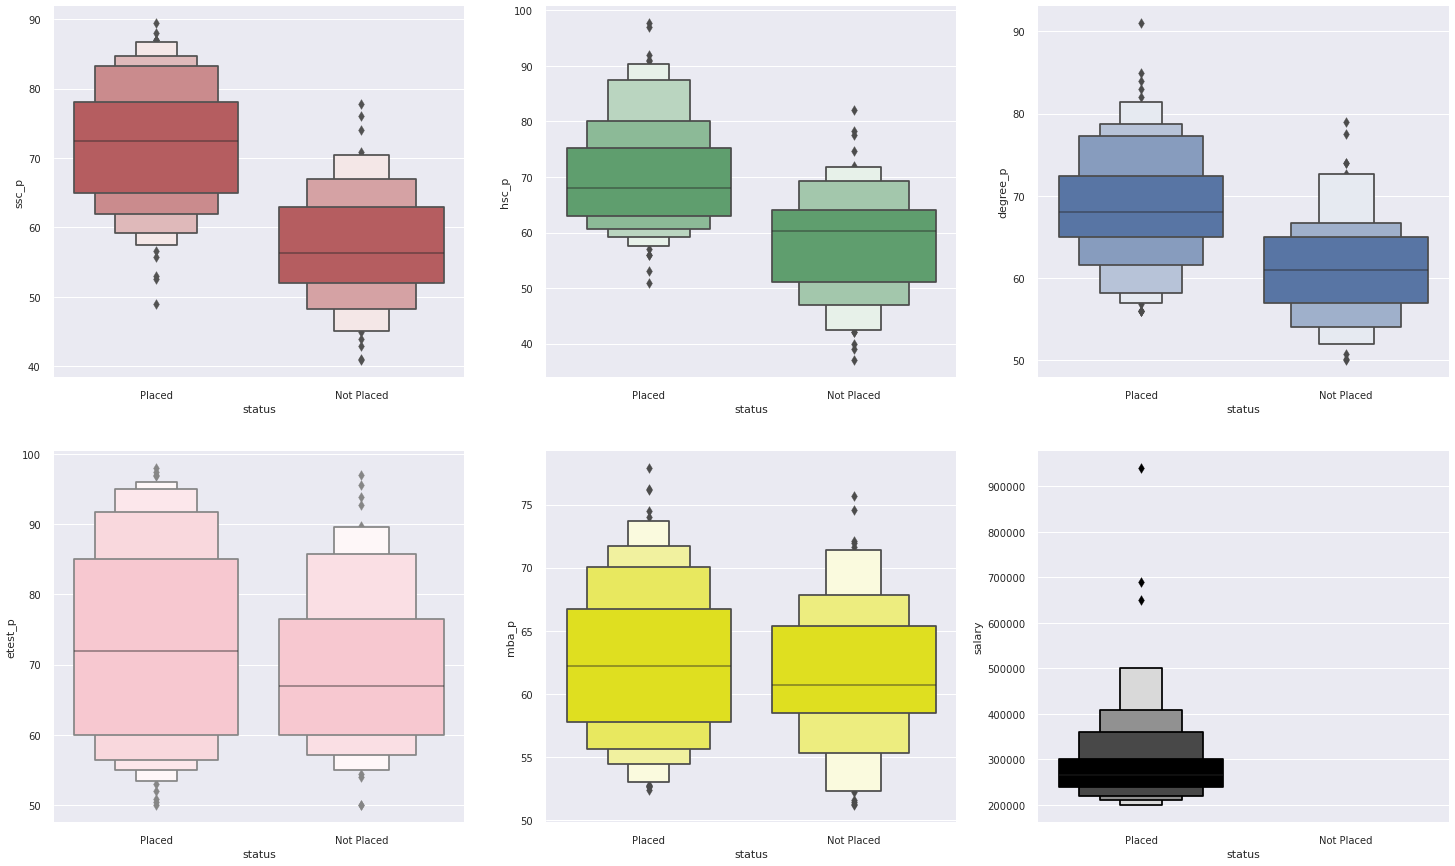

In [14]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['status'], y=dataset['ssc_p'],
              color="r", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['status'], y=dataset['hsc_p'],
              color="g", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['status'], y=dataset['degree_p'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,4)
sns.boxenplot(x=dataset['status'], y=dataset['etest_p'],
              color="pink", 
              scale="linear", data=dataset)

plt.subplot(2,3,5)
sns.boxenplot(x=dataset['status'], y=dataset['mba_p'],
              color="yellow", 
              scale="linear", data=dataset)

plt.subplot(2,3,6)
sns.boxenplot(x=dataset['status'], y=dataset['salary'],
              color="black", 
              scale="linear", data=dataset)

<a id="7"></a> 
# Basic Data Analysis

In [15]:
dataset['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [16]:
status_mapping = {'Not Placed': 0, 'Placed': 1}
dataset['status'] = dataset['status'].map(status_mapping)

<a id="8"></a> 
## Gender - Status

In [17]:
dataset[["gender","status"]].groupby(["gender"], as_index = False).count().sort_values(by="status",ascending = False)

gender  status
1      M     139
0      F      76

In [18]:
df = dataset

labels = dataset['gender'].value_counts().index
pie1 = dataset['gender'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Genders",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Genders",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

<a id="9"></a> 
## ssc_b - status

In [19]:
dataset[["ssc_b","status"]].groupby(["ssc_b"], as_index = False).count().sort_values(by="status",ascending = False)

ssc_b  status
0  Central     116
1   Others      99

Text(0.5, 1.0, "Distribution of Samples by 'ssc_b'")

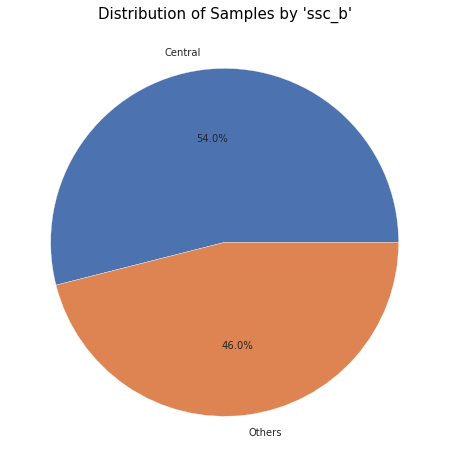

In [20]:
labels = dataset['ssc_b'].value_counts().index
sizes = dataset['ssc_b'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ssc_b'",color = 'black',fontsize = 15)

<a id="10"></a> 
## hsc_b - status

In [21]:
dataset[["hsc_b","status"]].groupby(["hsc_b"], as_index = False).count().sort_values(by="status",ascending = False)

hsc_b  status
1   Others     131
0  Central      84

Text(0.5, 1.0, "Distribution of Samples by 'hsc_b'")

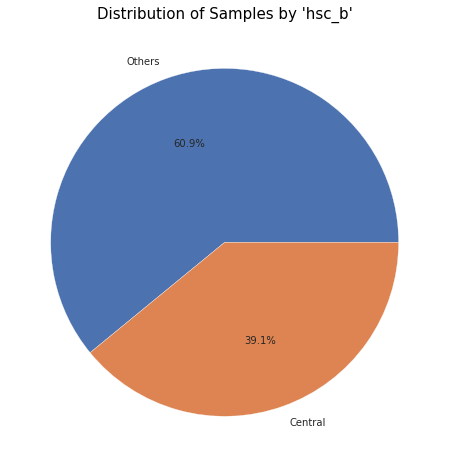

In [22]:
labels = dataset['hsc_b'].value_counts().index
sizes = dataset['hsc_b'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'hsc_b'",color = 'black',fontsize = 15)

<a id="11"></a> 
## degree_t - status

In [23]:
dataset[["degree_t","status"]].groupby(["degree_t"], as_index = False).count().sort_values(by="status",ascending = False)

degree_t  status
0  Comm&Mgmt     145
2   Sci&Tech      59
1     Others      11

Text(0.5, 1.0, "Distribution of Samples by 'degree_t'")

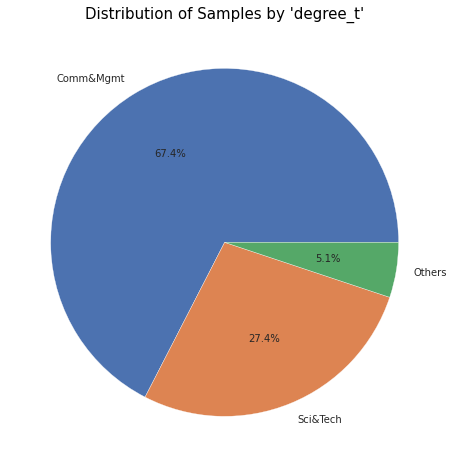

In [24]:
labels = dataset['degree_t'].value_counts().index
sizes = dataset['degree_t'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'degree_t'",color = 'black',fontsize = 15)

<a id="12"></a> 
## workex - status

In [25]:
dataset[["workex","status"]].groupby(["workex"], as_index = False).count().sort_values(by="status",ascending = False)

workex  status
0     No     141
1    Yes      74

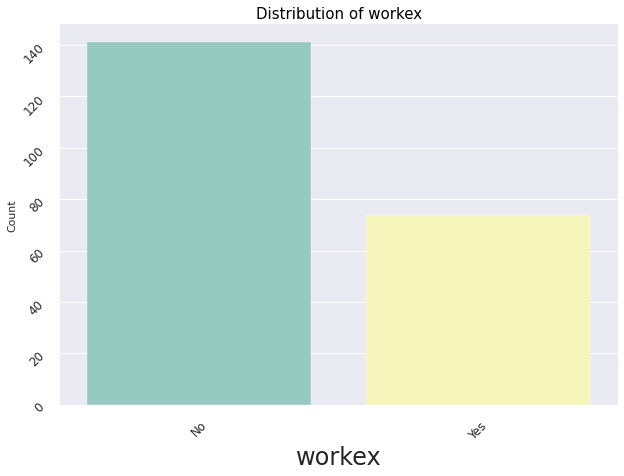

In [26]:
counts = dataset['workex'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('workex', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of workex',color = 'black',fontsize=15)
plt.show()

<a id="13"></a> 
## specialisation - status

In [27]:
dataset[["specialisation","status"]].groupby(["specialisation"], as_index = False).count().sort_values(by="status",ascending = False)

specialisation  status
0        Mkt&Fin     120
1         Mkt&HR      95

Text(0.5, 1.0, "Distribution of Samples by 'specialisation'")

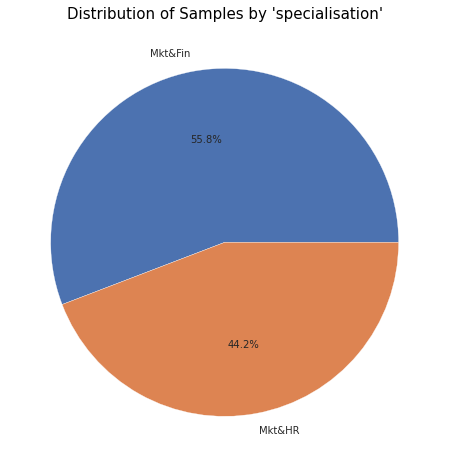

In [28]:
labels = dataset['specialisation'].value_counts().index
sizes = dataset['specialisation'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'specialisation'",color = 'black',fontsize = 15)

<a id="14"></a> 
## Triple review

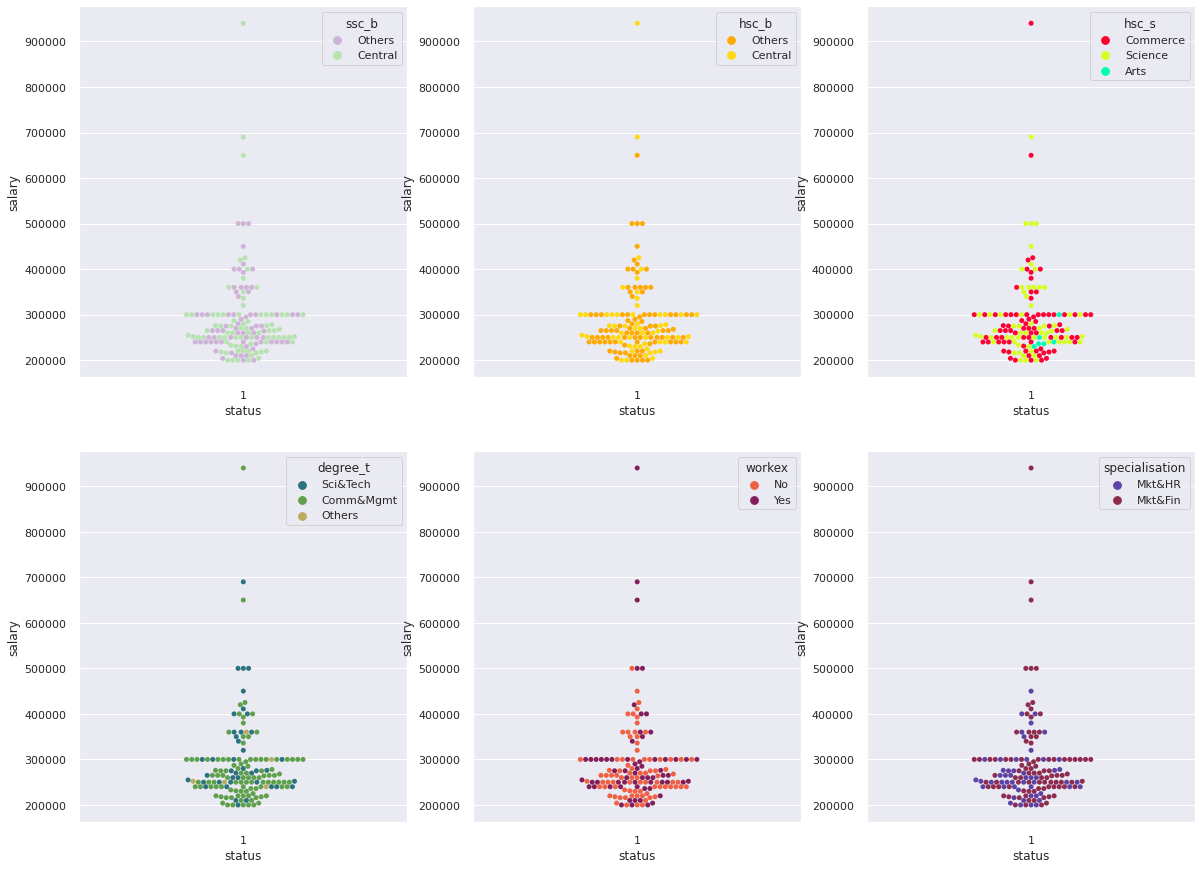

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="ssc_b", data=dataset, palette="PRGn")

plt.subplot(2,3,2)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="hsc_b", data=dataset, palette="Wistia_r")

plt.subplot(2,3,3)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="hsc_s", data=dataset, palette="gist_ncar_r")

plt.subplot(2,3,4)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="degree_t", data=dataset, palette="gist_earth")

plt.subplot(2,3,5)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="workex", data=dataset, palette="rocket_r")

plt.subplot(2,3,6)
sns.swarmplot(x = dataset[dataset['status'] == 1]['status'], y="salary",hue="specialisation", data=dataset, palette="twilight")

plt.show()

<a id="27"></a> 
# Questions

<a id="28"></a> 
## Does percentage matters for one to get placed?

<AxesSubplot:xlabel='status', ylabel='degree_p'>

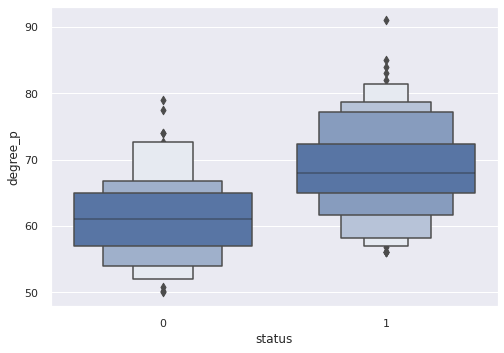

In [30]:
sns.set_theme(style="darkgrid")


sns.boxenplot(x=dataset['status'], y=dataset['degree_p'],
              color="b", 
              scale="linear", data=dataset)

<AxesSubplot:xlabel='status', ylabel='degree_p'>

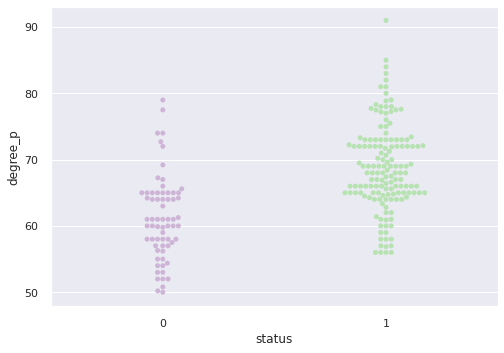

In [31]:
sns.swarmplot(x="status", y="degree_p", data=dataset, palette="PRGn")

**When we look at the graphics that placed above, we can see that percentage is important to get placed. The percentage value of those who are 'placed' starts from 55-60, while the percentage value of those who are 'not placed' starts from around 50. It can be said that the higher the 'degree_p' value, the higher the probability of being 'placed'.**

<a id="29"></a> 
## Which degree specialization is much demanded by corporate?

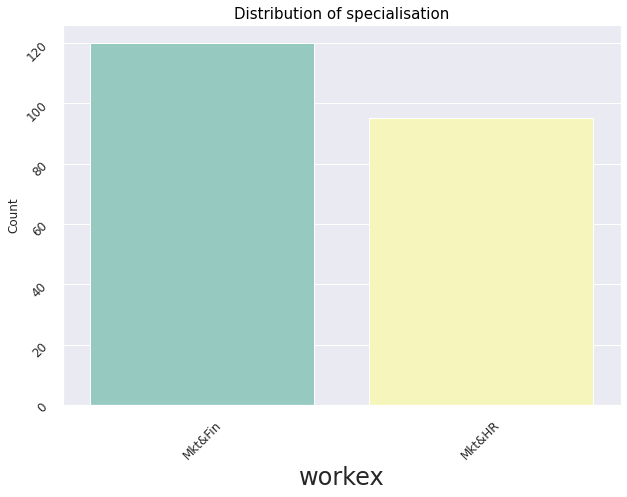

In [32]:
counts = dataset['specialisation'].value_counts()

#dataset[dataset['status'] == 1]['status']

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('workex', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of specialisation',color = 'black',fontsize=15)
plt.show()

**As you can see in this barplot, Mkt&Fin specialization is much demanded by corporate.**

<a id="15"></a> 
# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [33]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="16"></a> 
# Correlation

In [34]:
dataset.corr()

ssc_p     hsc_p  degree_p   etest_p     mba_p    status    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.607889  0.035330
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.491228  0.076819
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.479861 -0.019272
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.127639  0.178307
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.076922  0.175013
status    0.607889  0.491228  0.479861  0.127639  0.076922  1.000000       NaN
salary    0.035330  0.076819 -0.019272  0.178307  0.175013       NaN  1.000000

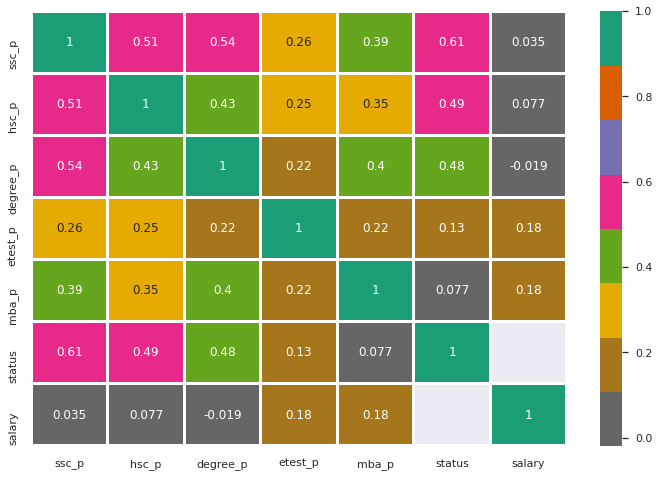

In [35]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

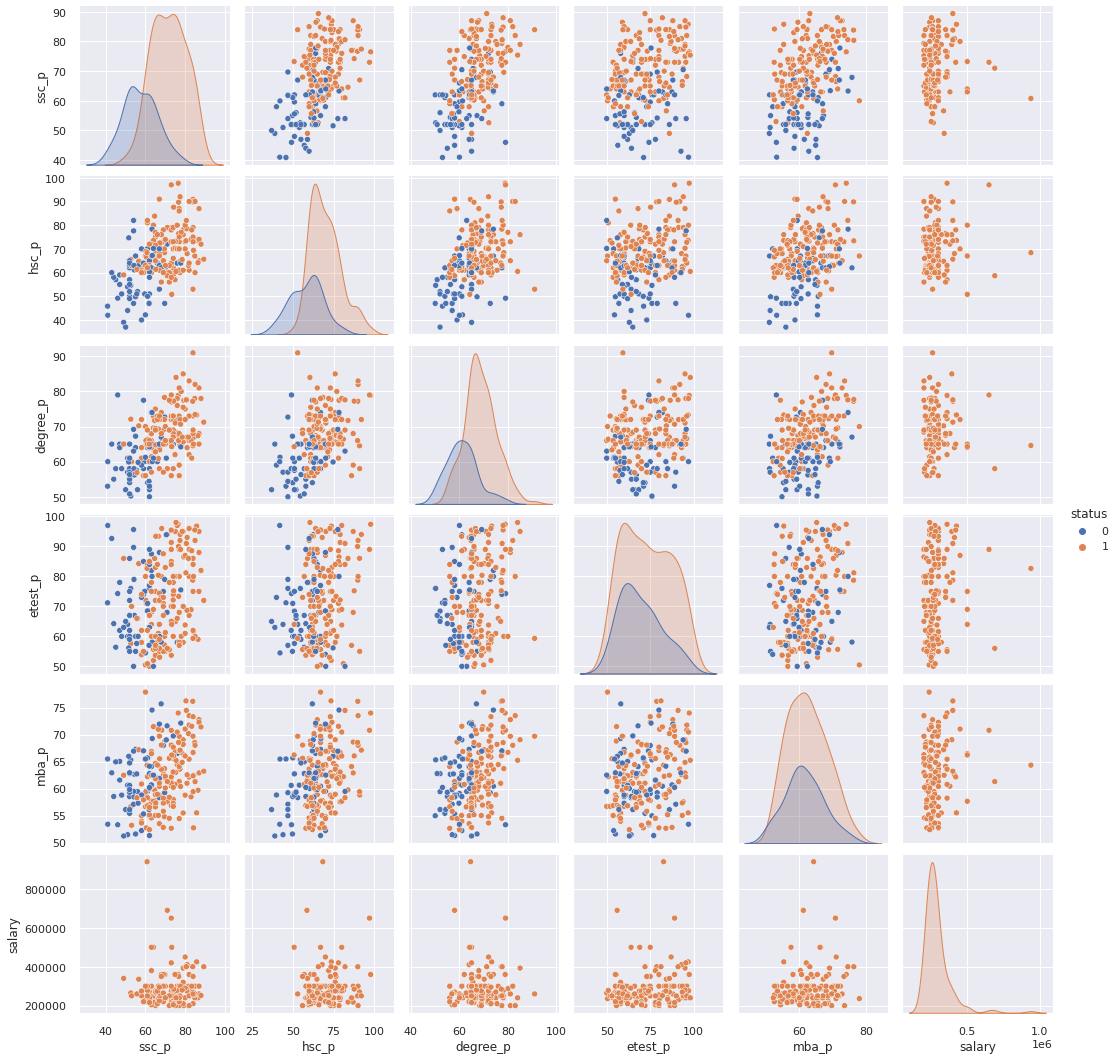

In [36]:
sns.pairplot(dataset, hue = 'status')

<a id="17"></a> 
# Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [37]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [38]:
dataset.loc[detect_outliers(dataset,['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'])]

Empty DataFrame
Columns: [gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary]
Index: []

***As you can see, there is no outliar data.***

<a id="18"></a> 
# Missing Values

In [39]:
dataset.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We have 67 null values in total. salary includes all. 

<a id="19"></a> 
## salary

In [40]:
dataset[dataset['salary'].isnull()]

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
3        M   56.0  Central   52.0  Central   Science     52.00   Sci&Tech   
5        M   55.0   Others   49.8   Others   Science     67.25   Sci&Tech   
6        F   46.0   Others   49.2   Others  Commerce     79.00  Comm&Mgmt   
9        M   58.0  Central   70.0  Central  Commerce     61.00  Comm&Mgmt   
12       F   47.0  Central   55.0   Others   Science     65.00  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
198      F   67.0  Central   70.0  Central  Commerce     65.00     Others   
201      M   54.2  Central   63.0   Others   Science     58.00  Comm&Mgmt   
206      M   41.0  Central   42.0  Central   Science     60.00  Comm&Mgmt   
208      F   43.0  Central   60.0   Others   Science     65.00  Comm&Mgmt   
214      M   62.0  Central   58.0   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p  status  salary  
3       No    66.00         Mkt&HR  59.43       0     NaN  
5      Yes    55.00        Mkt&Fin  51.58       0     NaN  
6       No    74.28        Mkt&Fin  53.29       0     NaN  
9       No    54.00        Mkt&Fin  52.21       0     NaN  
12      No    62.00         Mkt&HR  65.04       0     NaN  
..     ...      ...            ...    ...     ...     ...  
198     No    88.00         Mkt&HR  71.96       0     NaN  
201     No    79.00         Mkt&HR  58.44       0     NaN  
206     No    97.00        Mkt&Fin  53.39       0     NaN  
208     No    92.66         Mkt&HR  62.92       0     NaN  
214     No    89.00         Mkt&HR  60.22       0     NaN  

[67 rows x 14 columns]

**When we look at those who do not have 'Salary' data, we see that 'status' = 0. This means that those with 'status' = 0 do not receive a salary. Therefore, I will replace these people's salary column with 0.**

In [41]:
dataset['salary'] = dataset['salary'].fillna(0)

In [42]:
dataset[dataset['salary'].isnull()]

Empty DataFrame
Columns: [gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary]
Index: []

There is no null values anymore.

<a id="20"></a> 
# Encoding

I will handle Categorical Values.

In [43]:
cat_var = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

for i in range (0, len(cat_var)):
    print(f'Unique Values for {cat_var[i]}', dataset[f'{cat_var[i]}'].unique())

Unique Values for gender ['M' 'F']
Unique Values for ssc_b ['Others' 'Central']
Unique Values for hsc_b ['Others' 'Central']
Unique Values for hsc_s ['Commerce' 'Science' 'Arts']
Unique Values for degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique Values for workex ['No' 'Yes']
Unique Values for specialisation ['Mkt&HR' 'Mkt&Fin']


I will perform Label Encoding for 'gender', 'ssc_b', 'hsc_b', 'workex' and 'specialisation'. For the others I will make One-Hot Encoding.

<a id="21"></a> 
## Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [44]:
gender_mapping = {'M': 0, 'F': 1}
dataset['gender'] = dataset['gender'].map(gender_mapping)

In [45]:
ssc_b_mapping = {'Others': 0, 'Central': 1}
dataset['ssc_b'] = dataset['ssc_b'].map(ssc_b_mapping)

In [46]:
hsc_b_mapping = {'Others': 0, 'Central': 1}
dataset['hsc_b'] = dataset['hsc_b'].map(hsc_b_mapping)

In [47]:
workex_mapping = {'No': 0, 'Yes': 1}
dataset['workex'] = dataset['workex'].map(workex_mapping)

In [48]:
specialisation_mapping = {'Mkt&HR': 0, 'Mkt&Fin': 1}
dataset['specialisation'] = dataset['specialisation'].map(specialisation_mapping)

<a id="22"></a> 
## One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.


In [49]:
onehotencoder = OneHotEncoder()

In [50]:
one_hot = ['hsc_s', 'degree_t']

for i in range(0, len(one_hot)):
    dataset[f'{one_hot[i]}'] = pd.Categorical(dataset[f'{one_hot[i]}'])
    dummies = pd.get_dummies(dataset[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    dataset.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    dataset = pd.concat([dataset, dummies], axis=1)

In [51]:
dataset

gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0         0  67.00      0  91.00      0     58.00       0     55.0   
1         0  79.33      1  78.33      0     77.48       1     86.5   
2         0  65.00      1  68.00      1     64.00       0     75.0   
3         0  56.00      1  52.00      1     52.00       0     66.0   
4         0  85.80      1  73.60      1     73.30       0     96.8   
..      ...    ...    ...    ...    ...       ...     ...      ...   
210       0  80.60      0  82.00      0     77.60       0     91.0   
211       0  58.00      0  60.00      0     72.00       0     74.0   
212       0  67.00      0  67.00      0     73.00       1     59.0   
213       1  74.00      0  66.00      0     58.00       0     70.0   
214       0  62.00      1  58.00      0     53.00       0     89.0   

     specialisation  mba_p  status    salary  hsc_s_encoded_Arts  \
0                 0  58.80       1  270000.0                   0   
1                 1  66.28       1  200000.0                   0   
2                 1  57.80       1  250000.0                   1   
3                 0  59.43       0       0.0                   0   
4                 1  55.50       1  425000.0                   0   
..              ...    ...     ...       ...                 ...   
210               1  74.49       1  400000.0                   0   
211               1  53.62       1  275000.0                   0   
212               1  69.72       1  295000.0                   0   
213               0  60.23       1  204000.0                   0   
214               0  60.22       0       0.0                   0   

     hsc_s_encoded_Commerce  hsc_s_encoded_Science  \
0                         1                      0   
1                         0                      1   
2                         0                      0   
3                         0                      1   
4                         1                      0   
..                      ...                    ...   
210                       1                      0   
211                       0                      1   
212                       1                      0   
213                       1                      0   
214                       0                      1   

     degree_t_encoded_Comm&Mgmt  degree_t_encoded_Others  \
0                             0                        0   
1                             0                        0   
2                             1                        0   
3                             0                        0   
4                             1                        0   
..                          ...                      ...   
210                           1                        0   
211                           0                        0   
212                           1                        0   
213                           1                        0   
214                           1                        0   

     degree_t_encoded_Sci&Tech  
0                            1  
1                            1  
2                            0  
3                            1  
4                            0  
..                         ...  
210                          0  
211                          1  
212                          0  
213                          0  
214                          0  

[215 rows x 18 columns]

Now, we don't have categorical variables. Dataset is ready for Machine Leraning algorithms.

<a id="23"></a> 
# Train - Test Split

**Why am I dropping the 'salary' column?**

* When you train ML algorithms without dropping the 'salary' column, you will find that the accuracy is 100% for most. This is because those who are 'placed' have a salary value and those who are 'not placed' have a 'salary' value of 0.
* When a classification is made in this way, those with 'salary' = 0 are directly classified as 'not placed'. While correct, we want to determine whether the candidates are 'placed' or 'not placed' based on their given qualifications.
* Therefore, I will classify it by dropping the 'salary' column.

In [52]:
dataset.drop("salary", axis=1, inplace=True)

In [53]:
features = dataset.columns.drop('status')

label = ['status']

X = dataset[features]
y = dataset[label]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 215
Total # of sample in train dataset: 144
Total # of sample in validation dataset: 35
Total # of sample in test dataset: 36


Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [55]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="24"></a> 
# Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [56]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 81.94444444444444
Validation score of trained model: 77.14285714285715
Test score of trained model: 83.33333333333334
 
Confussion Matrix: 
[[11  1]
 [ 5 19]]

Accuracy : 0.8333333333333334
Precision: 0.95
Recall   : 0.7916666666666666
F1 score : 0.8636363636363635
Specificity : 0.9166666666666666

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.95      0.79      0.86        24

    accuracy                           0.83        36
   macro avg       0.82      0.85      0.82        36
weighted avg       0.86      0.83      0.84        36



############################################################################



BernoulliNB
Train score of trained model: 80.55555555555556
Validation score of trained model: 77.14285714285715
Test score of trained model: 83.33333333333334
 
Confussion Matrix: 
[[13  3]
 [ 3 17]]

Accuracy : 0.83333333333

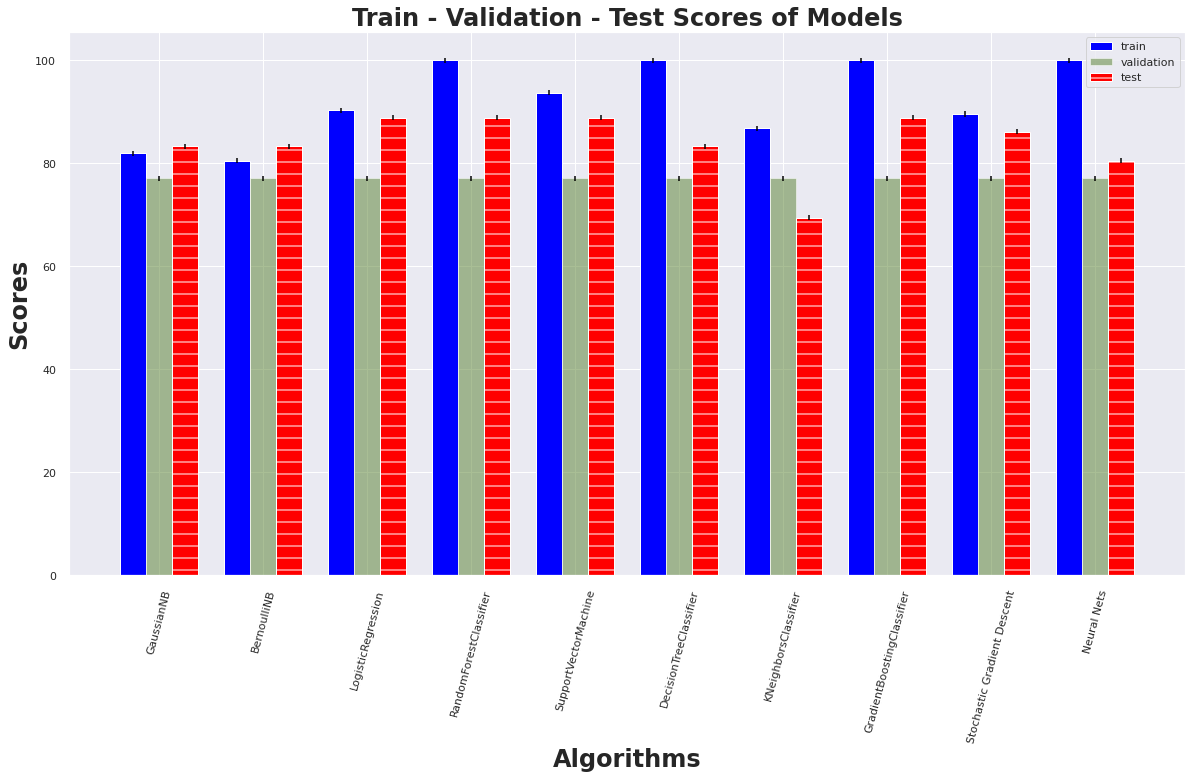

In [57]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [58]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 83.33333333333334
Accuracy of BernoulliNB -----> 83.33333333333334
Accuracy of LogisticRegression -----> 88.88888888888889
Accuracy of RandomForestClassifier -----> 88.88888888888889
Accuracy of SupportVectorMachine -----> 88.88888888888889
Accuracy of DecisionTreeClassifier -----> 83.33333333333334
Accuracy of KNeighborsClassifier -----> 69.44444444444444
Accuracy of GradientBoostingClassifier -----> 88.88888888888889
Accuracy of Stochastic Gradient Descent -----> 86.11111111111111
Accuracy of Neural Nets -----> 80.55555555555556


**When we look at the accuracy scores, we are predicting the 'status' with 88% accuracy with GBC and SVM. Also, when we look at the another statistical values such as, precision, recall, f1 score and specifity, we can conclude that out predictions are accurate.**

<a id="25"></a> 
# Evaluation of Models

<a id="40"></a> 
## Another Question: Which factor influenced a candidate in getting placed?

RandomForestClassifier
Old Shape: (215, 16) New shape: (215, 5)




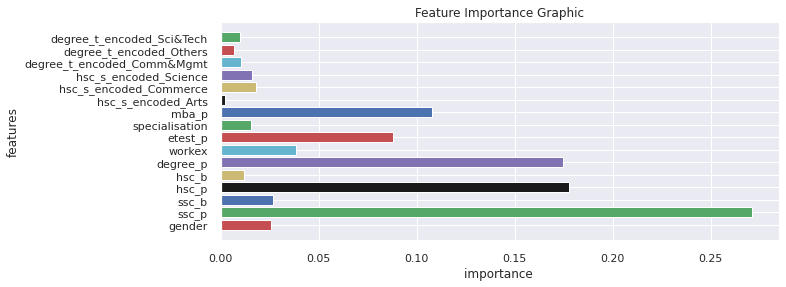

DecisionTreeClassifier
Old Shape: (215, 16) New shape: (215, 4)




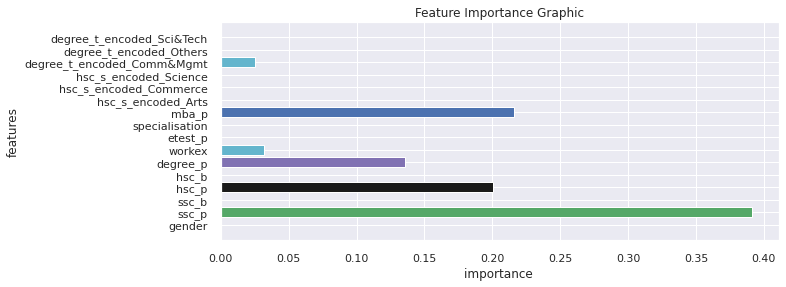

GradientBoostingClassifier
Old Shape: (215, 16) New shape: (215, 4)




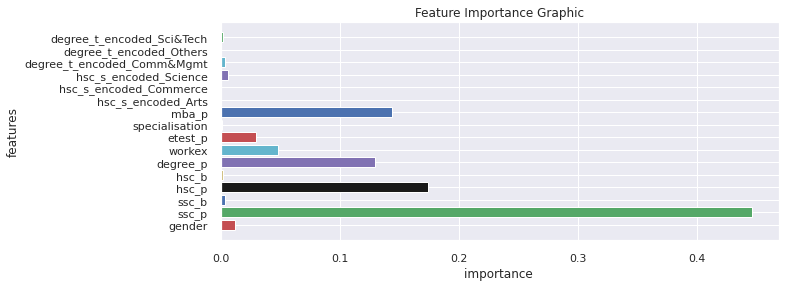

In [59]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
  plt.show()

Source for Feature Importance Code: https://www.kaggle.com/umutalpaydn/heart-disease-analysis-classification#Feature-Importance

**When we ask this question to the three classification algorithms, we see that the 'ssc_p' value is the most important property for the candidate to be 'placed'.**

In [60]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (215, 16) New shape: (215, 6)


LogisticRegression
Old Shape: (215, 16) New shape: (215, 4)


Stochastic Gradient Descent
Old Shape: (215, 16) New shape: (215, 4)




<a id="26"></a> 
# Conclusion

In this notebook, I examined Campus Recruitment Dataset. Firstly, I made Exploratory Data Analysis, Visualization, then I applied Machine Learning algorithms to this dataset. 

If you liked this notebook, you may want to see my other notebooks :)

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please let me know :)

* ***Thank you for your time.***